In [117]:
"""
Guilherme Araújo Mendes de Souza - 156437
UNIFESP - ICT
IA

Atividade 09
"""

'\nGuilherme Araújo Mendes de Souza - 156437\nUNIFESP - ICT\nIA\n\nAtividade 09\n'

In [118]:
pip install ucimlrepo

In [119]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
 # fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
Y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physical Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'doi': '

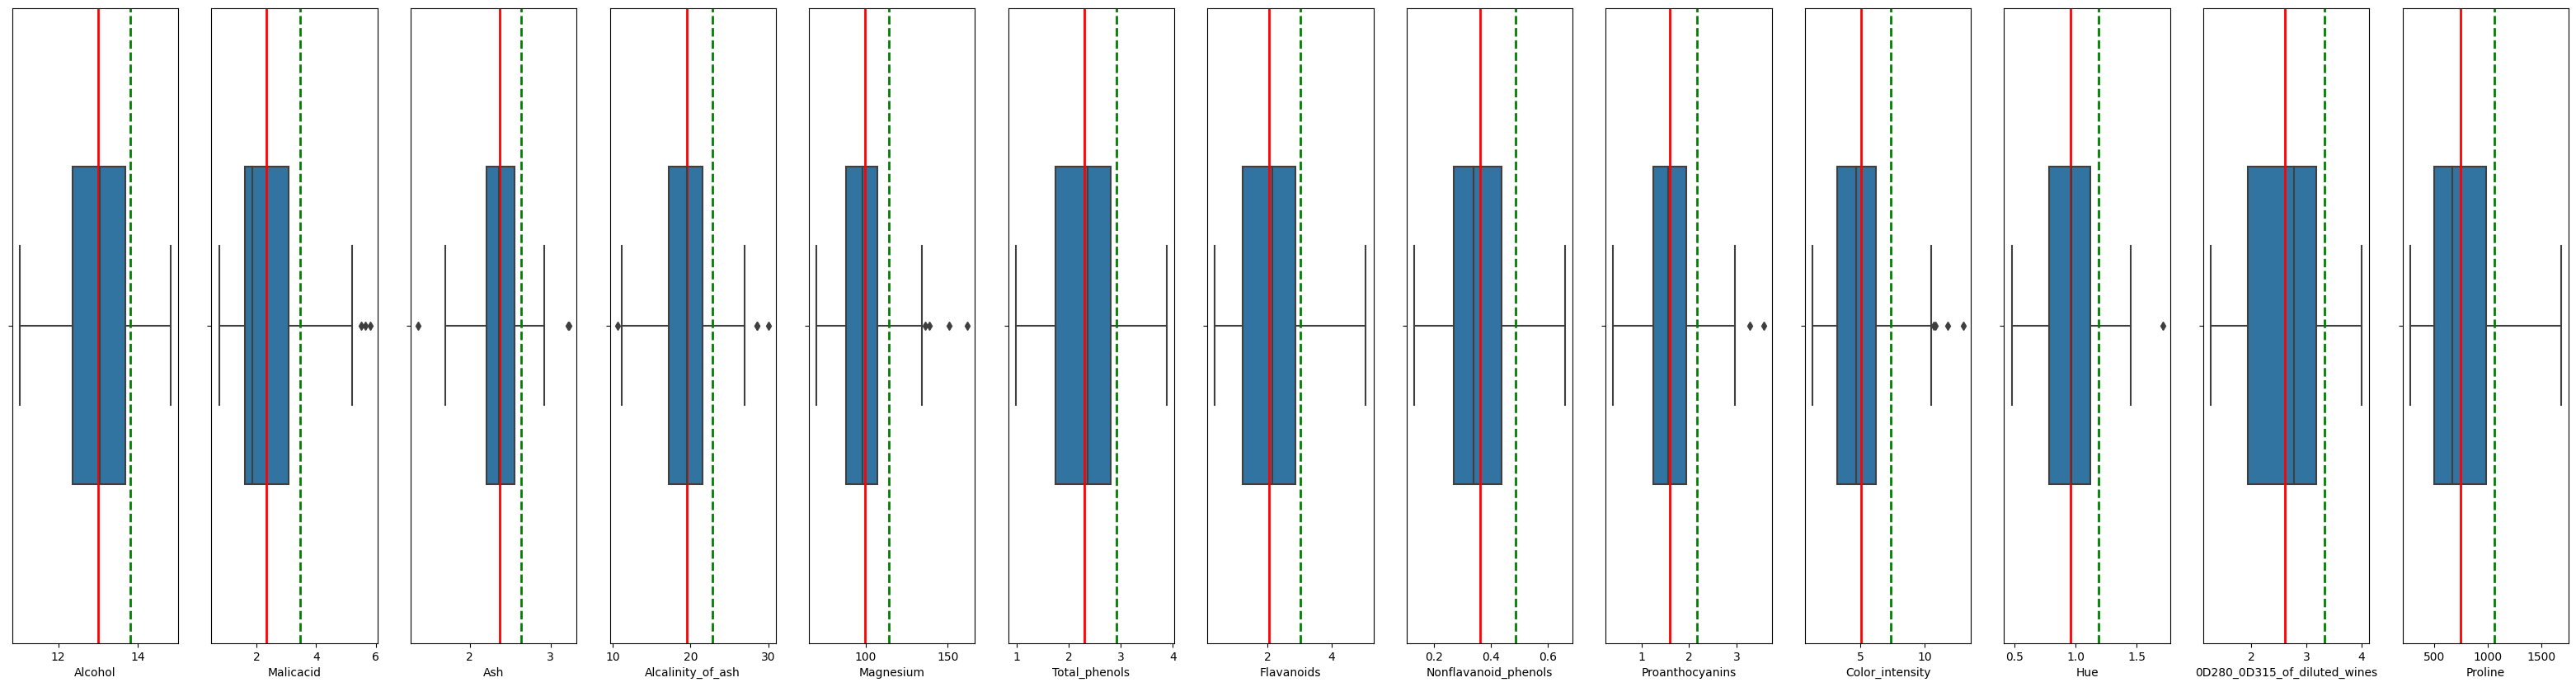

In [121]:
# A) Faça um boxplot analisando a média e desvio padrão dos valores de cada feature e se há outliers.
plt.figure(figsize=(40, 10))

for column in X.columns:
    plt.subplot(1, len(X.columns), X.columns.get_loc(column) + 1)

    sns.boxplot(x=X[column], orient='h', width=0.5)

    mean = X[column].mean()
    std = X[column].std()

    plt.axvline(mean, color='r', linestyle='-', linewidth=2, label=f'Média: {mean:.2f}')
    plt.axvline(mean + std, color='g', linestyle='--', linewidth=2, label=f'Desvio Padrão: {std:.2f}')

plt.show()

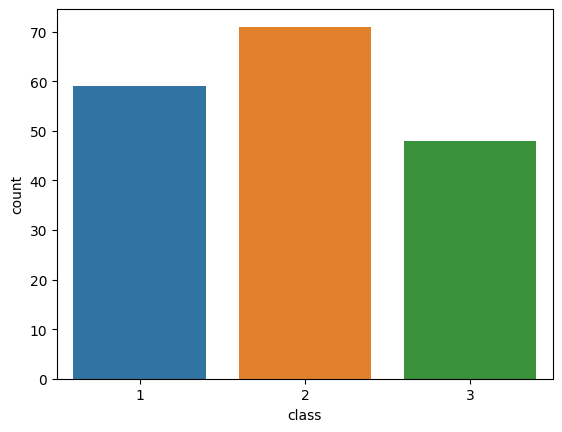

In [122]:
# B) Plote um gráfico com a distribuição de elementos em cada classe.
sns.countplot(x = 'class', data=Y, )
plt.show()

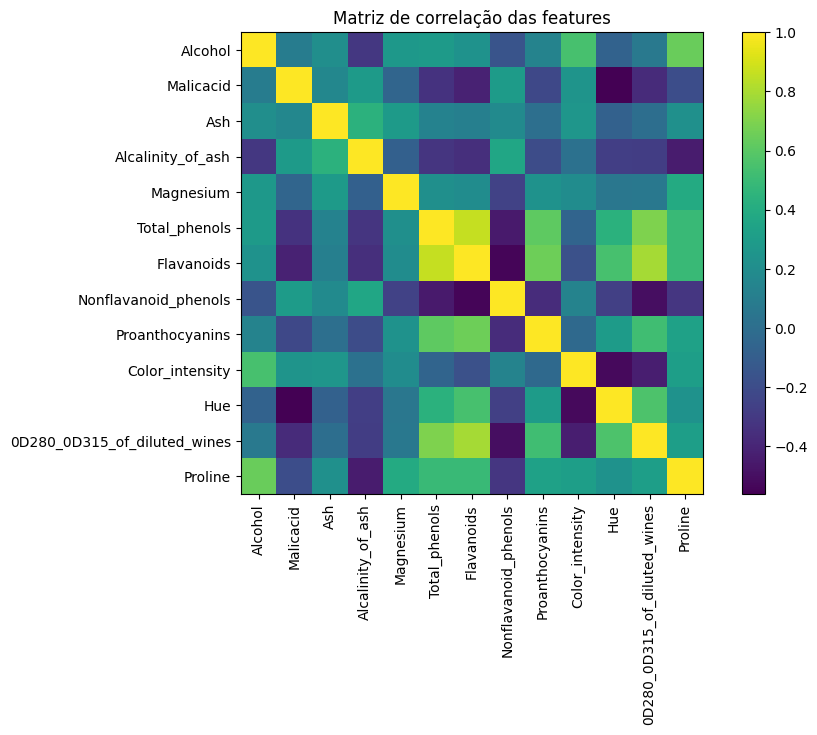

In [123]:
# C) Plote a matriz de correlação entre as features e indique quais atributos tem maior correlação entre si.
plt.figure(figsize=(10,6))
matrix = X.corr()
plt.imshow(matrix)
plt.colorbar()
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.yticks(range(len(X.columns)), X.columns)
plt.title("Matriz de correlação das features")
plt.show()

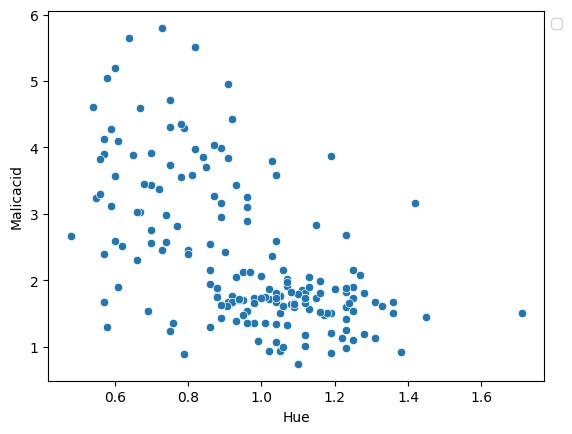

In [124]:
# D) Plote um gráfico 2D considerando duas variáveis com menor correlação.
min_corr = matrix.mask(np.tril(np.ones(matrix.shape)).astype(bool)).min().idxmin()
min_corr_col = matrix.loc[min_corr].idxmin()

sns.scatterplot(x= X[min_corr], y=X[min_corr_col], data=X, )
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()